## Importing libraries

In [36]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)

In [37]:
data = pd.read_csv('unit4_partially_processed.csv') 
data.head()

,STATE,DOB,MDMAUD,DOMAIN,INCOME,HOMEOWNR,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT,IC2_NEW
0,IL,3712,XXXX,T2,NaN,U,479,635,3,2,307,318,349,378,12883,74,27,6,14,9702,L4E,31,1.386294,7.741935,Low
1,CA,5202,XXXX,S1,6.0,H,5468,5218,12,10,1088,1096,1026,1037,36175,32,12,6,13,9702,L2G,3,2.890372,15.666667,High
2,NC,0,XXXX,R2,3.0,H,497,546,2,1,251,292,292,340,11576,63,26,6,14,9702,L4E,27,2.484907,7.481481,Low
3,CA,2801,XXXX,R2,1.0,H,1000,1263,2,1,386,388,396,423,15130,66,27,6,14,9702,L4E,16,2.197225,6.812500,Moderate
4,FL,2001,XXXX,S2,3.0,H,576,594,4,3,240,250,293,321,9836,113,43,10,25,9702,L2F,37,2.639057,6.864865,Low


## Feature engineering slide deck

feature engineering = a process of transforming the given data into a form that is easier to interpret

lets start with a feature extraction/generation challenge : 

Here we will use the column DOB to calculate the age of the client. As you can see, there are a lot of clients for whom the DOB is not known, so it is marked as 0. 

If we check, we will see that there are a lot of such clients so we can't just filter it out as we would lose a lot of data. So we would calculate the average age and later replace those 0's with mean age.

In [38]:
len(data[data['DOB'] == 0])

19047

In the DOB column, the format is YYMM. We will use this info to get the year when they were born.

In [39]:
def year(x):
  x =str(x)
  if (len(x) < 4):
    return np.nan
  else:
    return int(x[:2])

In [40]:
import re
def year(x):
    x = str(x)
    if len(x)<4:
        return np.nan
    else:
        pattern = '\d\d'
        yr = re.findall(pattern,x)[0]
        return int(yr)

Note that our reference year is 1997 because the data is from a 1997 study.

In [41]:
data['year'] = list(map(year, data['DOB']))
data['age'] = 97 - data['year']

data['age'] = data['age'].fillna(np.mean(data['age']))

In [42]:
# Now we can drop the column DOB as we have extracted the information we need from this column
data = data.drop(['DOB'], axis=1)
data = data.drop(['year'], axis=1)

In [43]:
data.head()

,STATE,MDMAUD,DOMAIN,INCOME,HOMEOWNR,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT,IC2_NEW,age
0,IL,XXXX,T2,NaN,U,479,635,3,2,307,318,349,378,12883,74,27,6,14,9702,L4E,31,1.386294,7.741935,Low,60.000000
1,CA,XXXX,S1,6.0,H,5468,5218,12,10,1088,1096,1026,1037,36175,32,12,6,13,9702,L2G,3,2.890372,15.666667,High,45.000000
2,NC,XXXX,R2,3.0,H,497,546,2,1,251,292,292,340,11576,63,26,6,14,9702,L4E,27,2.484907,7.481481,Low,59.376945
3,CA,XXXX,R2,1.0,H,1000,1263,2,1,386,388,396,423,15130,66,27,6,14,9702,L4E,16,2.197225,6.812500,Moderate,69.000000
4,FL,XXXX,S2,3.0,H,576,594,4,3,240,250,293,321,9836,113,43,10,25,9702,L2F,37,2.639057,6.864865,Low,77.000000


Feature selection challenge - which columns to keep for our model?

tip 1 - check null values to drop a column 
tip 2 - sense check which columns are likely to be useful to answer the question at hand... 
tip 3 - check multicollinearity for numerical variables using correlation/ heat maps etc 

*  Generate correlation matrix
*  Generate regression plots for highly correlated variables
*  Calculate R2 for highly correlated variables

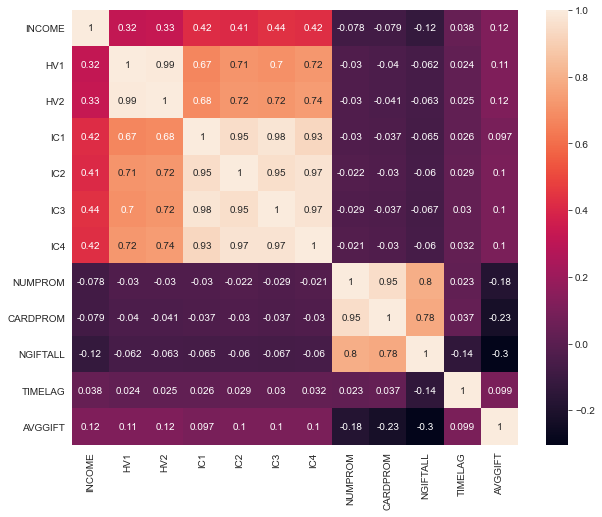

In [44]:
data_corr = data[['INCOME', 'HV1', 'HV2', 'IC1', 'IC2', 'IC3', 'IC4', 'NUMPROM', 'CARDPROM', 'NGIFTALL', 'TIMELAG', 'AVGGIFT']]
corr_matrix=data_corr.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

Through multivariate linear regression, we are trying to assess the influence of each of the predictor variables on the target variable. This influence/relationship is linear and is represented by a mathematical equation. The equation is given as: Y=β0+β1X1+β2X2+β3X3+β4X4+........+βnXn. Here, each variable is trying to explain some information about the nature of Y, how does Y change with each of the predictor variables. The change in Y with X is technically variation. When the predictor variables are all independent of each other, each variable explains some information on the change in Y. Multicollinearity arises when the predictor variables are highly correlated. Hence some predictors are redundant as they do not reveal any new information on the change in Y with a change in X.

The correlation matrix using the heat maps helps us understand the correlation between the independent variables. Using the sklearn.metrics module we calculate R square statistic. It measures the proportion of variance in the dependent variable that is explained by all of the independent variables.

For checking multicollinearity, we calculate R square k and VIF (variance inflation factor) for each of the k independent variables. We do this by regressing the k-th independent variable on all of the other independent variables. That is, we treat X k as the dependent variable and use the other independent variables to predict X k.

For eg. Y=β0+β1X1+β2X2+β3X3+β4X4

Build a model X1 vs. X2 X3 X4, find R^2, call it R1. Build a model X2 vs. X1 X3 X4, find R^2, call it R2. and so on and so forth

In [45]:
corr_matrix

,INCOME,HV1,HV2,IC1,IC2,IC3,IC4,NUMPROM,CARDPROM,NGIFTALL,TIMELAG,AVGGIFT
INCOME,1.000000,0.320634,0.331161,0.422768,0.411395,0.437932,0.424944,-0.077924,-0.079307,-0.123298,0.038185,0.115542
HV1,0.320634,1.000000,0.993332,0.672059,0.711533,0.702817,0.722786,-0.029546,-0.040233,-0.061736,0.023796,0.114545
HV2,0.331161,0.993332,1.000000,0.679478,0.720061,0.717683,0.739475,-0.030092,-0.041235,-0.063291,0.024993,0.116924
IC1,0.422768,0.672059,0.679478,1.000000,0.950548,0.975177,0.928983,-0.029718,-0.036779,-0.065053,0.026476,0.096847
IC2,0.411395,0.711533,0.720061,0.950548,1.000000,0.954639,0.973473,-0.022412,-0.030368,-0.059927,0.029301,0.100963
IC3,0.437932,0.702817,0.717683,0.975177,0.954639,1.000000,0.970901,-0.029496,-0.037169,-0.067305,0.030327,0.100210
IC4,0.424944,0.722786,0.739475,0.928983,0.973473,0.970901,1.000000,-0.021018,-0.029555,-0.060413,0.031998,0.102033
NUMPROM,-0.077924,-0.029546,-0.030092,-0.029718,-0.022412,-0.029496,-0.021018,1.000000,0.951919,0.796011,0.023048,-0.179752
CARDPROM,-0.079307,-0.040233,-0.041235,-0.036779,-0.030368,-0.037169,-0.029555,0.951919,1.000000,0.779419,0.037131,-0.226120
NGIFTALL,-0.123298,-0.061736,-0.063291,-0.065053,-0.059927,-0.067305,-0.060413,0.796011,0.779419,1.000000,-0.135846,-0.303843


As we can see, there are several variables highly correlated. In order to confirm this let's make scatter plots of pairs of correlated variables alongside with a linear regression.

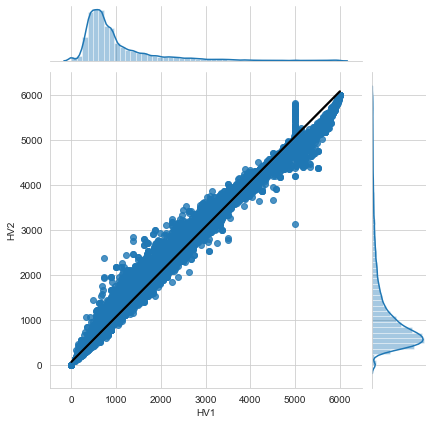

In [46]:
sns.jointplot(x="HV1", y="HV2", data=data_corr, kind='reg',joint_kws={'line_kws':{'color':'black'}})


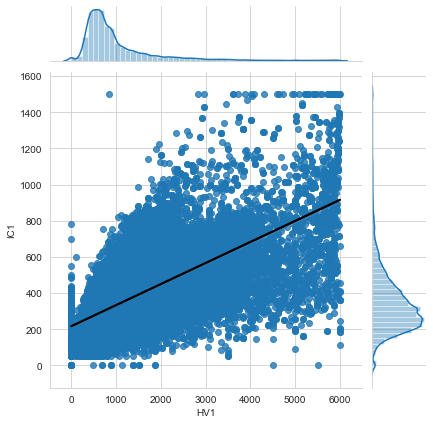

In [47]:
sns.jointplot(x="HV1", y="IC1", data=data_corr, kind='reg',joint_kws={'line_kws':{'color':'black'}})

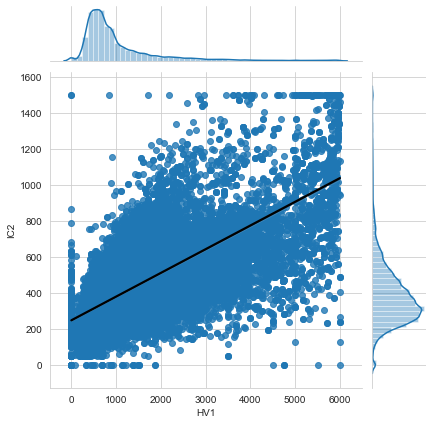

In [48]:
sns.jointplot(x="HV1", y="IC2", data=data_corr, kind='reg',joint_kws={'line_kws':{'color':'black'}})

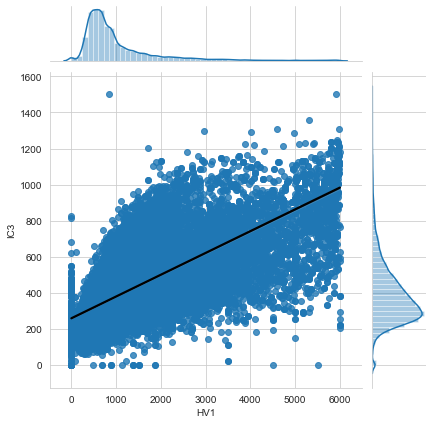

In [49]:
sns.jointplot(x="HV1", y="IC3", data=data_corr, kind='reg',joint_kws={'line_kws':{'color':'black'}})

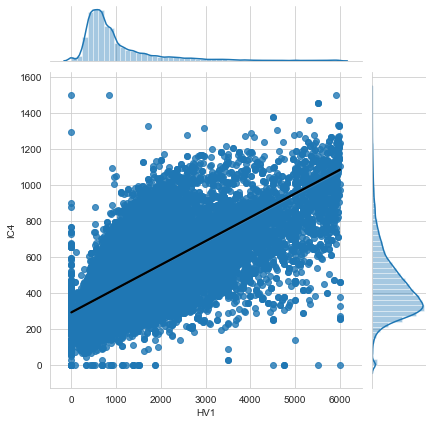

In [50]:
sns.jointplot(x="HV1", y="IC4", data=data_corr, kind='reg',joint_kws={'line_kws':{'color':'black'}})

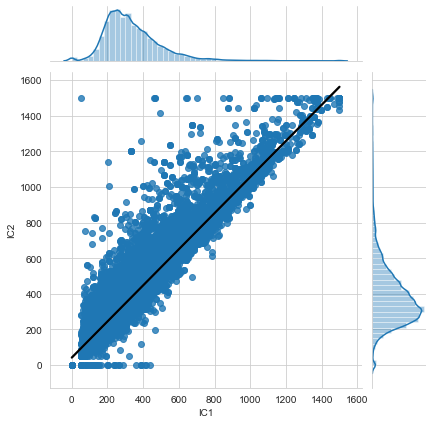

In [51]:
sns.jointplot(x="IC1", y="IC2", data=data_corr, kind='reg',joint_kws={'line_kws':{'color':'black'}})

to confirm this, we could also try making some linear models between pairs of those variables.

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score



what is r2 score? and can I 100% rely on it?
https://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit
Interpretation of the R2: 
If R2kequals zero, variable k is not correlated with any other independent variable. Usually, multicollinearity is a potential problem when R2k is greater than 0.75 and, a serious problem when R2k is greater than 0.9.

what is VIF? https://www.statisticshowto.com/variance-inflation-factor/
Interpretation of the variance inflation factor: 
If VIFk = 1, variable k is not correlated with any 
other independent variable. 
Multicollinearity is a potential problem 
when VIFk is greater than 4 and, 
a serious problem when it is greater than 10.

In [53]:
model = LinearRegression().fit(data_corr[['HV1']], data_corr[['HV2']])
model_r2 = model.score(data_corr[['HV1']], data_corr[['HV2']])
model_vif = 1/(1-model_r2)
print("The R2 of the model is: %5.3f" % (model_r2))
print("The VIF of the model is: %5.3f" % (model_vif))

The R2 of the model is: 0.987
The VIF of the model is: 75.237


In [54]:
model = LinearRegression().fit(data_corr[['IC1']], data_corr[['IC2']])
model_r2 = model.score(data_corr[['IC1']], data_corr[['IC2']])
model_vif = 1/(1-model_r2)
print("The R2 of the model is: %5.3f" % (model_r2))
print("The VIF of the model is: %5.3f" % (model_vif))

The R2 of the model is: 0.904
The VIF of the model is: 10.367


Let's see how we can automate some feature selection based on VIF.

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [56]:
data_corr.shape

(83568, 12)

NOTE: before using these techniques I must ensure there are no Nulls or NANs in my data - as these functions cannot handle missing values 

In [61]:
data_corr.isnull().sum().sort_values(ascending=False)

INCOME      16753
AVGGIFT         0
TIMELAG         0
NGIFTALL        0
CARDPROM        0
NUMPROM         0
IC4             0
IC3             0
IC2             0
IC1             0
HV2             0
HV1             0
const           0
dtype: int64

As we can see (and may remember) there are loads of missing values are in income. we have been through various methods to interpolate, predict, or drop these values already. 
Lets use the simple replace with mean technique for this exercise

In [62]:
data_corr.fillna(data_corr.mean(), inplace=True)

In [63]:
# This is the code to show how to use the 
#__variance_inflation_factor__ function
# We are using add_constant here as the VIF method in python
#expects the addition of a constant terms in the X features.
# (namely the intercept term). 
#It uses OLS but does not add the constant itself. 

vif = {}
data_corr = add_constant(data_corr)
#data_corr

for i in np.arange(data_corr.shape[1]):
    column_name = data_corr.columns[i]
    value = variance_inflation_factor(np.array(data_corr), i)
    vif[column_name] = value


In [64]:
# Code to use the variance_inflation_factor technique to remove highly correlated columns

flag = True
threshold = 50
data_corr = add_constant(data_corr)
while flag is True:
    #print(data_corr.head())
    flag = False
    values = [variance_inflation_factor(np.array(data_corr), i) for i in np.arange(data_corr.shape[1])]
    #print(values)
    if max(values)> threshold:
        col_index = values.index(max(values))
        column_name = data_corr.columns[col_index]
        data_corr = data_corr.drop([column_name], axis=1)
        flag = True

Summary re effects of Multicollinearity:
It makes it harder to interpret the significance of variables in the regression model (we will talk about statistical significance/p-value later).
It might give good enough results due to over-fitting, but those will not be very reliable (we will talk about over-fitting and under-fitting in more detail later. Over-fitting for now, you can explain to the students as a more complicated model and not very generalized ie it might work on the data at hand very well but not so well on the unknown/out of the box data.
It is also important to note that it does not severely impact the model in terms of predicting power if the only prediction is the main goal of the analysis.
Dealing with High Multicollinearity:

Centering/standardizing/normalizing variables may help reduce multicollinearity.
Removing one or more of the variables that are highly correlated with each other.

# Activity

Comparing the VIF method and the correlation matrix to perform feature selection.

Is it better to use use VIF or a correlation matrix threshold for feature selection?

There is not a correct answer, both are equally useful approaches to improve the quality of our data. In the case of multicollinearity, why not check both? If two or more columns are directly correlated for more than a 0.9 (extreme case) you may want to drop it, same for VIF over 10. Just check both and if one exceeds those numbers try to drop it.

In [65]:
# using corr

flag= True
while flag is True:
    flag = False
    for i in range(1, corr_matrix.shape[1]):
        if corr_matrix.iloc[i,range(i)].max() > 0.9:
            print(corr_matrix.columns[corr_matrix.iloc[i,range(i)].argmax()])
            col_name = corr_matrix.columns[corr_matrix.iloc[i,range(i)].argmax()]
            corr_matrix.drop([col_name], axis=1, inplace=True)
            corr_matrix.drop([col_name], inplace=True)

            flag = True
            break

print(corr_matrix.columns)

HV1
IC1
IC2
IC3
NUMPROM
Index(['INCOME', 'HV2', 'IC4', 'CARDPROM', 'NGIFTALL', 'TIMELAG', 'AVGGIFT'], dtype='object')


In [66]:
# using VIF

flag = True
threshold = 50
data_corr = add_constant(data_corr)
while flag is True:
    #print(data_corr.head())
    flag = False
    values = [variance_inflation_factor(np.array(data_corr), i) for i in np.arange(data_corr.shape[1])]
    #print(values)
    if max(values)> threshold:
        col_index = values.index(max(values))
        column_name = data_corr.columns[col_index]
        data_corr = data_corr.drop([column_name], axis=1)
        flag = True

print(data_corr.columns)

Index(['const', 'INCOME', 'HV1', 'IC1', 'IC2', 'IC4', 'NUMPROM', 'CARDPROM',
       'NGIFTALL', 'TIMELAG', 'AVGGIFT'],
      dtype='object')
